<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-transformations" data-toc-modified-id="Image-transformations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image transformations</a></span><ul class="toc-item"><li><span><a href="#Translation" data-toc-modified-id="Translation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Translation</a></span></li><li><span><a href="#Rotation" data-toc-modified-id="Rotation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Rotation</a></span></li><li><span><a href="#Resizing" data-toc-modified-id="Resizing-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Resizing</a></span></li><li><span><a href="#Flipping" data-toc-modified-id="Flipping-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Flipping</a></span></li></ul></li><li><span><a href="#Image-arithmetic" data-toc-modified-id="Image-arithmetic-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image arithmetic</a></span></li><li><span><a href="#Bitwise-operations" data-toc-modified-id="Bitwise-operations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bitwise operations</a></span></li></ul></div>

# Image Processing

## Image transformations

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('trex.png')

### Translation

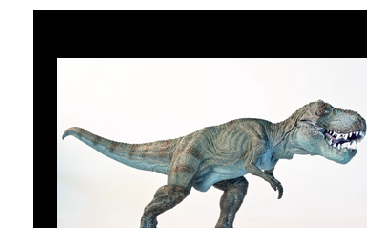

In [3]:
x_shift = 25
y_shift = 50
outputsize = (image.shape[1], image.shape[0])

transformation_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])  # define transformation matrix
shifted = cv2.warpAffine(image, transformation_matrix, outputsize)

plt.axis('off')
plt.imshow(shifted)
plt.show()

### Rotation

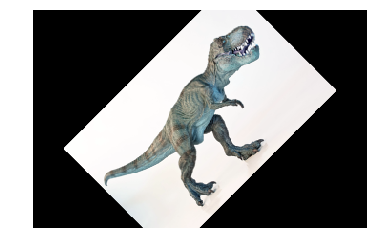

In [4]:
angle = 45
center = tuple(axis//2 for axis in outputsize)
outputsize = (image.shape[1], image.shape[0])
image_scale = 0.7

transformation_matrix = cv2.getRotationMatrix2D(center, angle, image_scale)
rotated = cv2.warpAffine(image, transformation_matrix, outputsize)

plt.axis('off')
plt.imshow(rotated)
plt.show()

### Resizing

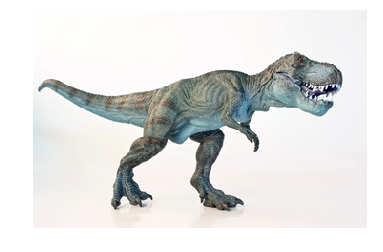

In [5]:
scaling_factor = 2.0
outputsize = tuple(int(axis*scaling_factor) for axis in outputsize)

resized = cv2.resize(image, outputsize, interpolation=cv2.INTER_AREA)

plt.axis('off')
plt.imshow(resized)
plt.show()

Although the resizing is not reflected in the output, we can that it is indeed resized by comparing the old and new shape.

In [6]:
for img in image, resized:
    print(img.shape)

(228, 350, 3)
(456, 700, 3)


### Flipping

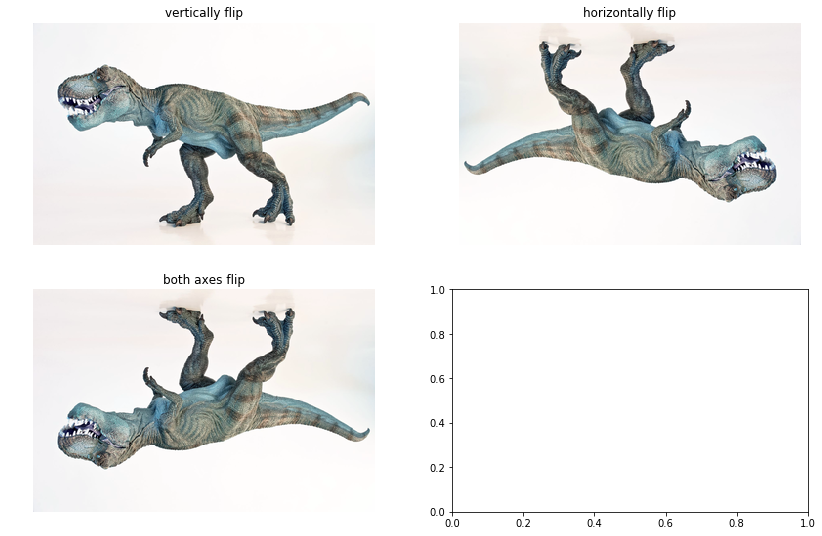

In [7]:
flip_options = [1, 0, -1]  # horizontally, vertically, both
descriptions = ['vertically flip', 'horizontally flip', 'both axes flip']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9), squeeze=True)

for ax, flip_option, description in zip(axs.reshape(-1), flip_options, descriptions):
    flipped = cv2.flip(image, flip_option)
    ax.imshow(flipped)
    ax.axis('off')
    ax.set_title(description)
plt.show()

## Image arithmetic

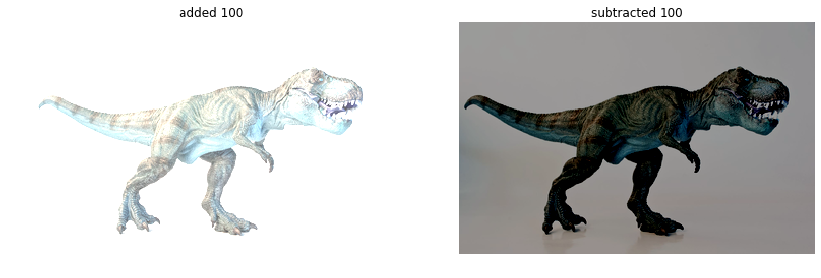

In [8]:
arithmetic_matrix = np.ones(image.shape, dtype='uint8') * 100

descriptions = ['added 100', 'subtracted 100']
actions = [cv2.add, cv2.subtract]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), squeeze=True)

for ax, action, description, in zip(axs, actions, descriptions):
    processed_image = action(image, arithmetic_matrix)
    ax.axis('off')
    ax.imshow(processed_image)
    ax.set_title(description)
plt.show()

## Bitwise operations

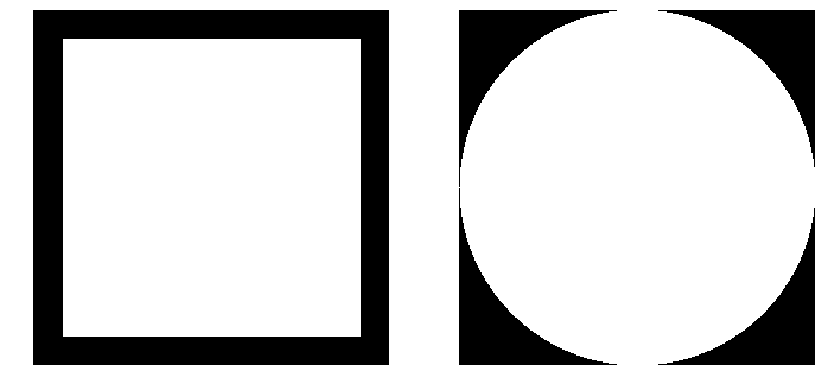

In [9]:
canvas = np.zeros((300, 300), dtype='uint8')
rectangle = cv2.rectangle(canvas, (25, 25), (275, 275), 255, -1)  # creates white rectangle

canvas = np.zeros((300, 300), dtype='uint8')
circle = cv2.circle(canvas, (150, 150), 150, 255, -1)  # creates white circle

geometric_forms = [rectangle, circle]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 9), squeeze=True)

for geometric_form, ax in zip(geometric_forms, axs):
    ax.axis('off')
    ax.imshow(geometric_form, cmap='gray')
plt.show()

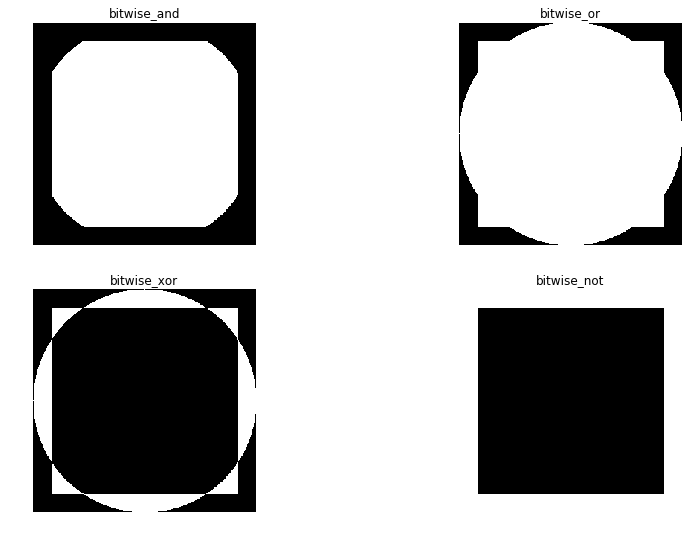

In [10]:
bitwise_operations = [cv2.bitwise_and, cv2.bitwise_or, cv2.bitwise_xor, cv2.bitwise_not]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9), squeeze=True)

for bitwise_operation, ax in zip(bitwise_operations, axs.reshape(-1)):
    new_image = bitwise_operation(rectangle, circle)
    ax.set_title(bitwise_operation.__name__)
    ax.axis('off')
    ax.imshow(new_image, cmap='gray')
plt.show()